<a href="https://colab.research.google.com/github/reshalfahsi/neuralnetwork/blob/main/notebook/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Package**

## **Install Package**

In [1]:
!cd /content
!git clone -q https://github.com/reshalfahsi/neuralnetwork
%cd neuralnetwork
!pip install -q .

/content/neuralnetwork
  Preparing metadata (setup.py) ... done


## **Hyperparameters**

In [2]:
NUM_EPOCHS = 32
BATCH_SIZE = 16
lr = 1e-2

## **Dataset Preparation**

This tutorial will use a toy dataset from [MedMNIST](https://medmnist.com/). We use PneumoniaMNIST, which contains 2D X-ray image-label pairs for distinguishing between Pneumonia-infected and healthy lungs. The pneumonia-infected lung is denoted by the label `1` whilst the healthy lung is labeled as `0`.

In [3]:
from neuralnetwork.ds.medmnist import PneumoniaMNIST
from neuralnetwork import ds
import numpy as np


train_dataset = PneumoniaMNIST(split='train', download=True)
test_dataset = PneumoniaMNIST(split='test', download=True)

print("Train Dataset:", len(train_dataset))
print("Test Dataset", len(test_dataset))

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Train Dataset: 4708
Test Dataset 624


/usr/local/lib/python3.9/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


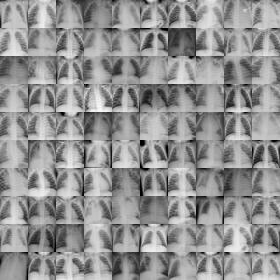

In [4]:
train_dataset.montage(length=10)

## **Neural Network**

The artificial neural network is a bio-inspired machine learning method that models neuronal signal propagation by matrix multiplication. Here we have two kinds of neuronal signal propagation: forward propagation and backward propagation. In forward propagation, the neuron actively conveys information from the "receptor" (or input) to the "central nervous system" (or output). Backward propagation or backpropagation, in short, is utilized in the training or learning process. In the learning process, the neural network transmits error gradients from the "central nervous system" to the "receptor". For further knowledge about the learning process, read more: [Calculus on Computational Graphs: Backpropagation](https://colah.github.io/posts/2015-08-Backprop/) and [Backpropagation for a Linear Layer
](https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html).

In [5]:
import neuralnetwork.nn as nn


class NeuralNetwork(nn.Module):
    def __init__(self, **kwargs):
        super(NeuralNetwork, self).__init__(**kwargs)
        self.linear0 = nn.Linear(784, 200, **kwargs)
        self.linear1 = nn.Linear(200, 200, **kwargs)
        self.linear2 = nn.Linear(200, 1, **kwargs)

        self.activation = nn.Sigmoid()

    def forward(self, x):
        self.out0 = self.linear0(x)
        self.out1 = self.activation(self.out0)
        self.out2 = self.linear1(self.out1)
        self.out3 = self.activation(self.out2)
        self.out4 = self.linear2(self.out3)
        self.out5 = self.activation(self.out4)

        return self.out5
    
    def backward(self, lr, criterion, method=None):
                                                               # Computational Graph
                                                               #
        self.dx0 = criterion.grad()                            # loss_grad(pred, y)
                                                               #        |
        self.dx1 = self.activation.grad(self.out4)             # sigmoid_grad(pred)
                                                               #        |
                                                               #        +
                                                               #       / \
                                                               #      |   |
                                                               #  b_grad  *
                                                               #         / \
                                                               #        |   |
        self.dx2 = self.linear2.grad(self.dx1 * self.dx0)      #   A_grad   x_grad
                                                               #          .
        self.dx3 = self.activation.grad(self.out2)             #          .
        self.dx4 = self.linear1.grad(self.dx3 * self.dx2)      #          .

        self.dx5 = self.activation.grad(self.out0)
        self.dx6 = self.linear0.grad(self.dx5 * self.dx4)

        if method == 'newton':
            self.d2x0 = criterion.grad('hessian')                                                        
            self.d2x1 = self.activation.grad(self.out4, 'hessian')

            gradient = {
                'error_first': self.dx0,
                'error_second': self.d2x0,
                'nonlinearity_first': self.dx1,
                'nonlinearity_second': self.d2x1,
            }               

            self.d2x2 = self.linear2.grad(gradient, 'hessian')
            self.d2x3 = self.activation.grad(self.out2, 'hessian') 

            gradient = {
                'error_first': self.dx2,
                'error_second': self.d2x2,
                'nonlinearity_first': self.dx3,
                'nonlinearity_second': self.d2x3,
            }         
                                                                            
            self.d2x4 = self.linear1.grad(gradient, 'hessian')
            self.d2x5 = self.activation.grad(self.out0, 'hessian')

            gradient = {
                'error_first': self.dx4,
                'error_second': self.d2x4,
                'nonlinearity_first': self.dx5,
                'nonlinearity_second': self.d2x5,
            } 

            self.d2x6 = self.linear0.grad(gradient, 'hessian')

        self.linear0.update(lr, method)
        self.linear1.update(lr, method)
        self.linear2.update(lr, method)

## **Utilities**

In [6]:
import time
import matplotlib.pyplot as plt


def accuracy(model, X, Y):
    pred = model(X)
    pred = pred > 0.5
    acc = np.sum(pred == Y)
    acc = acc / Y.shape[0]
    return acc

seed = np.random.randint(2147483647)
print(seed)

1640259851


## **Gradient Descent**

### **Training**

Size 4708
1/294 - The training loss at 1th epoch : 92.5788195927356  Training Accuracy:0.1875
21/294 - The training loss at 1th epoch : 18.61824719066083  Training Accuracy:0.6666666666666666
41/294 - The training loss at 1th epoch : 13.280892206320518  Training Accuracy:0.7332317073170732
61/294 - The training loss at 1th epoch : 11.214336914281796  Training Accuracy:0.7612704918032787
81/294 - The training loss at 1th epoch : 10.158893975057612  Training Accuracy:0.7723765432098766
101/294 - The training loss at 1th epoch : 9.376772103245434  Training Accuracy:0.7852722772277227
121/294 - The training loss at 1th epoch : 8.734687158862517  Training Accuracy:0.7949380165289256
141/294 - The training loss at 1th epoch : 8.261021983905064  Training Accuracy:0.8040780141843972
161/294 - The training loss at 1th epoch : 7.799977394417204  Training Accuracy:0.8140527950310559
181/294 - The training loss at 1th epoch : 7.493666157522519  Training Accuracy:0.8207872928176796
201/294 - The tr

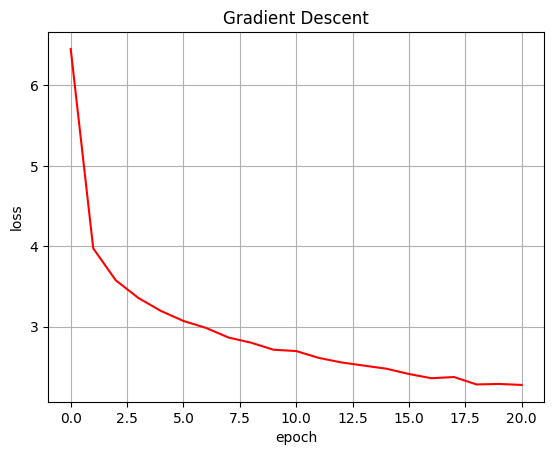

<Figure size 640x480 with 0 Axes>

In [7]:
train_loader = ds.get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = ds.get_loader(dataset=test_dataset, batch_size=1)

criterion = nn.BCELoss()
np.random.seed(seed)
model = NeuralNetwork()

loss_train = list()


start = time.perf_counter()
for epoch in range(NUM_EPOCHS):
    loss = list()
    acc = list()
    for idx, pack in enumerate(train_loader):
        x, y = pack
        bs = x.shape[0]
        L = x.shape[1] * x.shape[2]
        x = x.reshape(bs, 1, L) / 255.0
        y = y.reshape(bs, 1, 1)
        pred = model(x)
        loss.append(criterion(pred, y))
        model.backward(lr, criterion)
        acc.append(accuracy(model, x, y))
        if idx % 20 == 0 or idx == len(train_dataset) - 1:
            print(
                "{}/{} - The training loss at {}th epoch : {}  Training Accuracy:{}".format(
                    idx + 1,
                    len(train_dataset) // BATCH_SIZE,
                    epoch + 1,
                    np.array(loss).mean(),
                    np.array(acc).mean(),
                ),
            )
        if idx >= int(len(train_dataset) / BATCH_SIZE) - 1:
            break

    loss_train.append(np.array(loss).mean())

    if np.array(acc).mean() > 0.95:
        break
    print("-----------------------------------------------------------")
end = time.perf_counter()

print(f"Training finished in {epoch + 1} epochs and {end - start:0.4f} seconds")

plt.title("Gradient Descent")
plt.plot(loss_train, color = 'r')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.clf()

### **Testing**

Size 624
Accuracy on testing: 64.1%
FPS: 4111.83


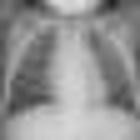

Prediction: Healthy
Ground Truth: Healthy


In [8]:
import random
from IPython.display import display


acc = list()
fps = list()

# Evaluation
for idx, pack in enumerate(test_loader):
     start = time.perf_counter()
     x, y = pack
     bs = x.shape[0]
     L = x.shape[1] * x.shape[2]
     x = x.reshape(bs, 1, L) / 255.0
     y = y.reshape(bs, 1, 1)
     acc.append(accuracy(model, x, y))
     end = time.perf_counter()
     fps.append(1./(end - start))

     if idx >= int(len(test_dataset) / BATCH_SIZE) - 1:
         break


print(f"Accuracy on testing: {round(np.array(acc).mean() * 100., 2)}%")
print(f"FPS: {round(np.array(fps).mean(), 2)}")

# Sample
index = random.randint(0, len(test_dataset))

x, y = test_dataset[index]
display(x.resize((140, 140)))
x = np.array(x)
L = x.shape[0] * x.shape[1]
x = x.reshape(1, 1, L)/255.
pred = model(x)

pred = pred.squeeze(0).squeeze(0)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
print("Prediction: Pneumonia" if pred[0] else "Prediction: Healthy")
print("Ground Truth: Pneumonia" if y[0] else "Ground Truth: Healthy")

## **Newton Method**

### **Training**

Size 4708
1/294 - The training loss at 1th epoch : 84.94750302276087  Training Accuracy:0.8125


/content/neuralnetwork/neuralnetwork/nn/activation.py:24: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-input))


21/294 - The training loss at 1th epoch : 515.5217243015225  Training Accuracy:0.6815476190476191
41/294 - The training loss at 1th epoch : 485.7195619413076  Training Accuracy:0.7027439024390244
61/294 - The training loss at 1th epoch : 490.69767602880336  Training Accuracy:0.7008196721311475
81/294 - The training loss at 1th epoch : 471.5416373826526  Training Accuracy:0.7129629629629629
101/294 - The training loss at 1th epoch : 446.6788210873176  Training Accuracy:0.7283415841584159
121/294 - The training loss at 1th epoch : 436.00993174205854  Training Accuracy:0.7350206611570248
141/294 - The training loss at 1th epoch : 431.2975763919928  Training Accuracy:0.738031914893617
161/294 - The training loss at 1th epoch : 426.4730244844531  Training Accuracy:0.7410714285714286
181/294 - The training loss at 1th epoch : 424.99707918361776  Training Accuracy:0.7420580110497238
201/294 - The training loss at 1th epoch : 419.1904246446314  Training Accuracy:0.7456467661691543
221/294 - Th

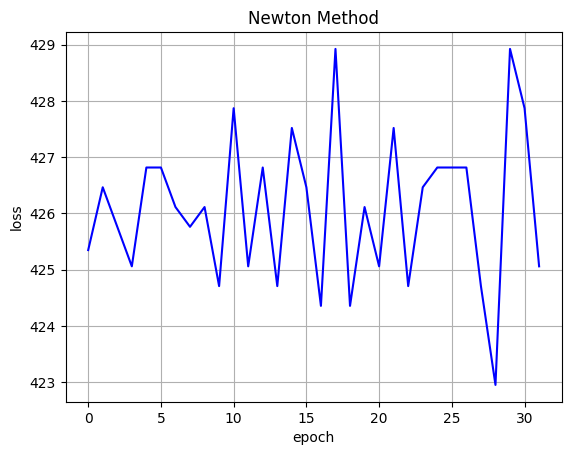

<Figure size 640x480 with 0 Axes>

In [9]:
train_loader = ds.get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = ds.get_loader(dataset=test_dataset, batch_size=1)

criterion = nn.BCELoss()
np.random.seed(seed)
model = NeuralNetwork()

loss_train = list()


start = time.perf_counter()
for epoch in range(NUM_EPOCHS):
    loss = list()
    acc = list()
    for idx, pack in enumerate(train_loader):
        x, y = pack
        bs = x.shape[0]
        L = x.shape[1] * x.shape[2]
        x = x.reshape(bs, 1, L) / 255.0
        y = y.reshape(bs, 1, 1)
        pred = model(x)
        loss.append(criterion(pred, y))
        model.backward(lr, criterion, 'newton')
        acc.append(accuracy(model, x, y))
        if idx % 20 == 0 or idx == len(train_dataset) - 1:
            print(
                "{}/{} - The training loss at {}th epoch : {}  Training Accuracy:{}".format(
                    idx + 1,
                    len(train_dataset) // BATCH_SIZE,
                    epoch + 1,
                    np.array(loss).mean(),
                    np.array(acc).mean(),
                ),
            )
        if idx >= int(len(train_dataset) / BATCH_SIZE) - 1:
            break

    loss_train.append(np.array(loss).mean())

    if np.array(acc).mean() > 0.95:
        break
    print("-----------------------------------------------------------")
end = time.perf_counter()

print(f"Training finished in {epoch + 1} epochs and {end - start:0.4f} seconds")

plt.title("Newton Method")
plt.plot(loss_train, color = 'b')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.clf()

### **Testing**

Size 624
Accuracy on testing: 58.97%
FPS: 3945.58


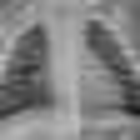

Prediction: Pneumonia
Ground Truth: Healthy


In [10]:
import random
from IPython.display import display


acc = list()
fps = list()

# Evaluation
for idx, pack in enumerate(test_loader):
     start = time.perf_counter()
     x, y = pack
     bs = x.shape[0]
     L = x.shape[1] * x.shape[2]
     x = x.reshape(bs, 1, L) / 255.0
     y = y.reshape(bs, 1, 1)
     acc.append(accuracy(model, x, y))
     end = time.perf_counter()
     fps.append(1./(end - start))

     if idx >= int(len(test_dataset) / BATCH_SIZE) - 1:
         break


print(f"Accuracy on testing: {round(np.array(acc).mean() * 100., 2)}%")
print(f"FPS: {round(np.array(fps).mean(), 2)}")

# Sample
index = random.randint(0, len(test_dataset))

x, y = test_dataset[index]
display(x.resize((140, 140)))
x = np.array(x)
L = x.shape[0] * x.shape[1]
x = x.reshape(1, 1, L)/255.
pred = model(x)

pred = pred.squeeze(0).squeeze(0)
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
print("Prediction: Pneumonia" if pred[0] else "Prediction: Healthy")
print("Ground Truth: Pneumonia" if y[0] else "Ground Truth: Healthy")